In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt

# Load, Process, and Explore Data

In [2]:
filename = 'credit-data.csv' # insert file name here
seperator = ',' # change if necessary
df = pd.read_csv(filename, sep=seperator)

In [3]:
df.shape   

(150000, 13)

In [4]:
df.dtypes

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [5]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
# Column has null values?
pd.isnull(df).sum() > 0

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [7]:
# Fill NA values in MonthlyIncome and NumberOfDependents columns
df['MonthlyIncome'].fillna(value=df['MonthlyIncome'].mean(), inplace=True)
df['NumberOfDependents'].fillna(value=df['NumberOfDependents'].median(), inplace=True)
pd.isnull(df).sum() > 0

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

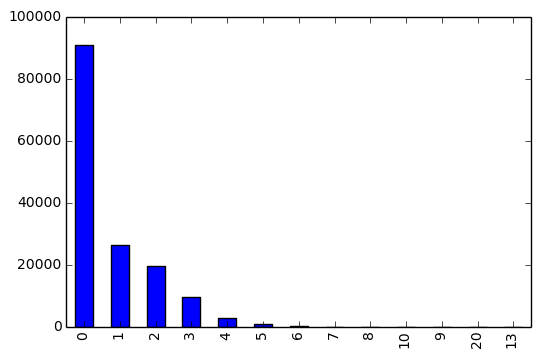

In [8]:
# Convert Number of Dependents to integer
df['NumberOfDependents'] = df['NumberOfDependents'].astype(int)
pd.value_counts(df['NumberOfDependents']).plot(kind='bar')

In [9]:
df.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


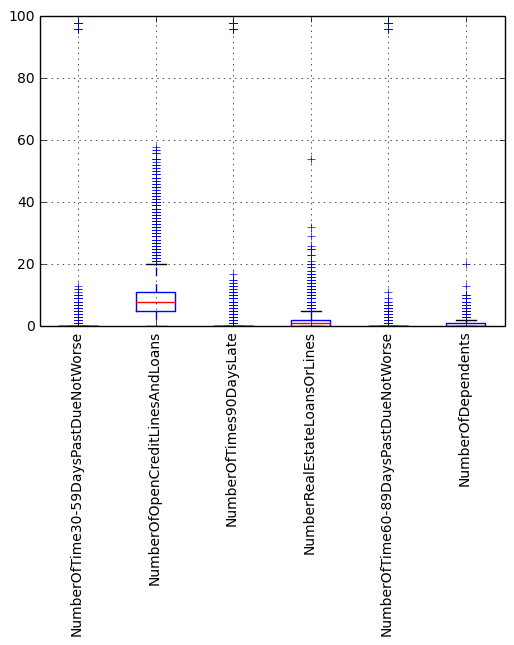

In [10]:
# Draw box and whisker of relevant columns
df.boxplot(column=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'], rot=90)

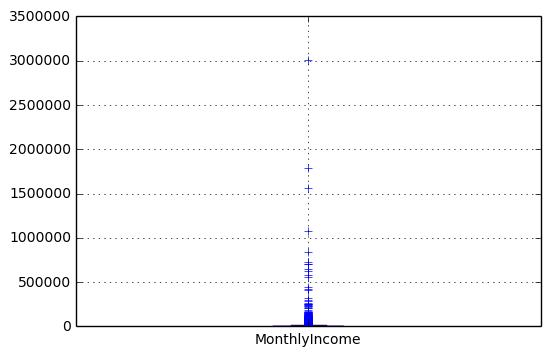

In [11]:
# Draw box and whisker of income column
df.boxplot(column=['MonthlyIncome'])

# Generate Features

In [12]:
# functions for capping features with extreme upper values
def get_ceiling(colname):
    return df[colname].quantile(.999)

def set_ceiling(x, ceiling):
    if x > ceiling:
        return ceiling
    else:
        return x

In [13]:
# cap relevant columns at ceiling
for c in ['RevolvingUtilizationOfUnsecuredLines','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']:
    ceiling = get_ceiling(c)
    df[c] = df[c].apply(lambda x: set_ceiling(x, ceiling))


In [14]:
# DELETE Function for creating equally sized buckets
def equal_buckets(colname):
    df['bins_' + colname] = pd.cut(df[colname], bins=10)

    display(pd.value_counts(df['bins_MonthlyIncome']))

In [15]:
# create age buckets, with larger bins near extremes to capture outliers 
agebins = [0] + list(range(20,80,5)) + [110]
df['bins_age'] = pd.cut(df['age'],bins=agebins)
pd.value_counts(df['bins_age'])
# Question: why do these bins not capture the one person in (0,20] bin?

(45, 50]     18829
(50, 55]     17861
(55, 60]     16945
(60, 65]     16461
(40, 45]     16208
(35, 40]     13611
(65, 70]     10963
(30, 35]     10728
(75, 110]    10129
(25, 30]      7730
(70, 75]      7507
(20, 25]      3027
(0, 20]          0
Name: bins_age, dtype: int64

In [16]:
# Function for bucketing continuous features into equally-sized groups (by 10% quantiles)
def variable_buckets(colname):
    buckets = []

    for i in np.arange(0.0,1.1,.1):
        buckets.append(df[colname].quantile(i))
    df['bins_' + colname] = pd.cut(df[colname], bins=buckets)

In [17]:
# Apply variable bucketing to continuous features
for c in ['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome']:
    variable_buckets(c)
  
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,bins_age,bins_RevolvingUtilizationOfUnsecuredLines,bins_DebtRatio,bins_MonthlyIncome
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13.0,0,6.0,0,2.0,"(40, 45]","(0.699, 0.981]","(0.649, 4]","(8250, 10750]"
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4.0,0,0.0,0,1.0,"(35, 40]","(0.699, 0.981]","(0.0309, 0.134]","(2325, 3400]"
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2.0,1,0.0,0,0.0,"(35, 40]","(0.445, 0.699]","(0.0309, 0.134]","(2325, 3400]"
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5.0,0,0.0,0,0.0,"(25, 30]","(0.154, 0.271]","(0.0309, 0.134]","(2325, 3400]"
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7.0,0,1.0,0,0.0,"(45, 50]","(0.699, 0.981]","(0, 0.0309]","(10750, 72759.15700000289]"


In [18]:
# observe variable bin sizes we just made
display(pd.value_counts(df['bins_RevolvingUtilizationOfUnsecuredLines']))
display(pd.value_counts(df['bins_DebtRatio']))
display(pd.value_counts(df['bins_MonthlyIncome']))
# Question: Why are these not distributed evenly?

(0.981, 1571.006]    15000
(0.699, 0.981]       15000
(0.445, 0.699]       15000
(0.271, 0.445]       15000
(0.154, 0.271]       15000
(0.0832, 0.154]      15000
(0.0435, 0.0832]     15000
(0.0192, 0.0435]     15000
(0.00297, 0.0192]    15000
(0, 0.00297]          4122
Name: bins_RevolvingUtilizationOfUnsecuredLines, dtype: int64

(0.649, 4]           15108
(0.468, 0.649]       15001
(0.367, 0.468]       15000
(0.287, 0.367]       15000
(0.214, 0.287]       15000
(0.134, 0.214]       15000
(0.0309, 0.134]      15000
(1267, 10613.074]    14995
(4, 1267]            14896
(0, 0.0309]          10887
Name: bins_DebtRatio, dtype: int64

(6600, 6670.22123739284]                30629
(2325, 3400]                            15278
(4333, 5400]                            15257
(8250, 10750]                           15009
(10750, 72759.15700000289]              14984
(5400, 6600]                            14910
(3400, 4333]                            14769
(6670.22123739285, 8250]                14153
(0, 2325]                               13377
(6670.22123739284, 6670.22123739285]        0
Name: bins_MonthlyIncome, dtype: int64

In [19]:
# Generate dummy variables for Number of Dependents (categorical variable)
dep_dummies = pd.get_dummies(df['NumberOfDependents'])
df = pd.concat([df, dep_dummies], axis=1)
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,...,bins_RevolvingUtilizationOfUnsecuredLines,bins_DebtRatio,bins_MonthlyIncome,0.0,1.0,2.0,3.0,4.0,5.0,6.0
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13.0,0,...,"(0.699, 0.981]","(0.649, 4]","(8250, 10750]",0,0,1,0,0,0,0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4.0,0,...,"(0.699, 0.981]","(0.0309, 0.134]","(2325, 3400]",0,1,0,0,0,0,0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2.0,1,...,"(0.445, 0.699]","(0.0309, 0.134]","(2325, 3400]",1,0,0,0,0,0,0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5.0,0,...,"(0.154, 0.271]","(0.0309, 0.134]","(2325, 3400]",1,0,0,0,0,0,0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7.0,0,...,"(0.699, 0.981]","(0, 0.0309]","(10750, 72759.15700000289]",1,0,0,0,0,0,0
